In [1]:
import pandas as pd

cluster_data = pd.read_excel('Datasets/Telecom_Cluster.xlsx')
cluster_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Telecom_Cluster.xlsx'

Remove categorical data, keep only continous data in your dataset
Outliers and missing values should be treated
Euclidian distance is the distance between the centroid and the point
Euclidian distance won't work for categorical variables

In [11]:
X=cluster_data.iloc[:, [1,6]].values

In [12]:
from sklearn.cluster import KMeans

## Find out number clusters exist in the data
Sum_of_squared_distances = []
K = range(1,15)
#Develop 15 set of models to determine what is the optimal number which is value of k
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\nisha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nisha\AppData\Local\Temp\ipykernel_15056\2408606922.py:9: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  km = km.fit(X)


In [13]:
Two extreme cases:
    1.Each row as one cluster
    2. Whole dataset as one cluster

Optimal number for K-Means must be fixed

SyntaxError: invalid syntax (3965088707.py, line 1)

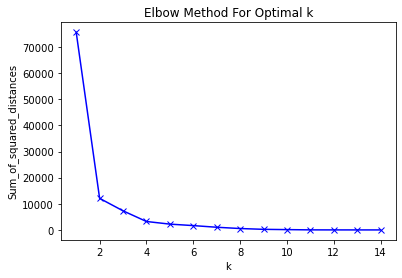

In [14]:
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
SSD-Sum of squared distance
To select optimal cluster we use WSS or SSD(to select best model)

SSD for two cluster model is around 13000
We will not consider lesser of more SSD, best cluster solution in clustering is given wherever there is a huge bend

SyntaxError: invalid syntax (497649353.py, line 1)

In [ ]:
## 3 Cluster solution

In [15]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=1,random_state=0 )
#N_Init gives the number of centroids 
#kmeans = KMeans(n_clusters=5, init ='k-means', max_iter=300, n_init=10,random_state=0 )

In [16]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans
#seeing which cluster each data point belongs to

array([1, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1])

In [9]:
'''The Silhouette Coefficient is calculated using the mean intra-cluster distance ( a ) 
and the mean nearest-cluster distance ( b ) for each sample. 
The Silhouette Coefficient for a sample is (b - a) / max(a, b) 

#Wherever Silhoute score is more, you should select that cluster

-1 to 1, near to 1 is good'''

from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.668


In [10]:
cluster_data['clusters'] = y_kmeans
cluster_data.head()

,Cno,DataUsage,Rev,Onnet,Offnet,SMS,ILD,clusters
0,1,99,291,160,61,69,102,1
1,2,0,45,454,81,25,0,2
2,3,12,199,272,84,65,0,2
3,4,55,318,212,75,54,147,1
4,5,75,60,401,74,0,0,0


In [11]:
cluster_data.to_csv('C:\\Users\\PandaBas\\Desktop\\Personal\\Teaching\\Jul_30\\telecom_cluster_output.csv')

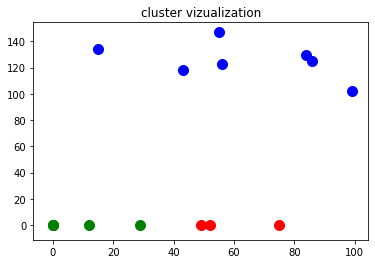

In [12]:
plt.title("cluster vizualization")

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')